## 非参数估计——Parzen窗与K近邻估计

In [8]:
import numpy as np
import math
import copy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def cube(u) :
    T = abs(u)
    if all(t <= 0.5 for t in T) :
        return 1
    else :
        return 0

def gaussian_1D(u) :
    t = 1/((math.pi * 2) ** 0.5)
    return t * math.exp(- (u**2) / 2)

def Parzen(Data, X, h, d, f) :
    Prob = []
    n = len(Data)
    for x in X :
        p = 0.0
        for s in Data :
            p += f((s-x)/h)
        Prob.append(p / (n * (h**d)))
    return np.array(Prob) 

def eudistance(x, y) :
    d = 0.0
    T = x - y 
    for t in T:
        d += t ** 2
    return (d ** 0.5)


def knn(Data, X, kn, d, f) :
    t = kn / len(Data)
    Prob = []
    for x in X :
        dis = []
        for s in Data :
            dis.append(f(x,s))
        dis.sort()
        v = (dis[kn] * 2) ** d
        Prob.append(t/v)
    return np.array(Prob)



In [9]:
def test_1D_pk() :
    Data = np.random.normal(0, 1, 10000).reshape([-1,1])
    X = np.arange(-5, 5, 0.1).reshape([-1,1])
    Prob1 = Parzen(Data, X, h = 0.01, d = 1, f = cube)



    ax = plt.subplot(3,3,1)
    ax.set_title("h = 0.01")
    ax.plot(X, Prob1)
    plt.ylabel("Parzen: cube")

    Prob2 = Parzen(Data, X, h = 0.1, d = 1, f = cube)
    ax = plt.subplot(3,3,2)
    ax.set_title("h = 0.1")
    ax.plot(X, Prob2)

    Prob3 = Parzen(Data, X, h = 1, d = 1, f = cube)
    ax = plt.subplot(3,3,3)
    ax.set_title("h = 1")
    ax.plot(X, Prob3)



    Prob1 = Parzen(Data, X, h = 0.01, d = 1, f = gaussian_1D)
    ax = plt.subplot(3,3,4)
    ax.set_title("h = 0.01")
    ax.plot(X, Prob1)
    plt.ylabel("Parzen: gaussian")

    Prob2 = Parzen(Data, X, h =0.1, d = 1, f = gaussian_1D)
    ax = plt.subplot(3,3,5)
    ax.set_title("h = 0.1")
    ax.plot(X, Prob2)

    Prob3 = Parzen(Data, X, h = 1, d = 1, f = gaussian_1D)
    ax = plt.subplot(3,3,6)
    ax.set_title("h = 1")
    ax.plot(X, Prob3)



    Prob1 = knn(Data, X, kn = 10, d = 1, f = eudistance)
    ax = plt.subplot(3,3,7)
    ax.set_title("kn = 10")
    ax.plot(X, Prob1)

    plt.ylabel("knn")

    Prob2 = knn(Data, X, kn = 30, d = 1, f = eudistance)
    ax = plt.subplot(3,3,8)
    ax.set_title("kn = 30")
    ax.plot(X, Prob2)


    Prob3 = knn(Data, X, kn = 100, d = 1, f = eudistance)
    ax = plt.subplot(3,3,9)
    ax.set_title("kn = 100")
    ax.plot(X, Prob3)
    plt.show()


In [10]:
def test_2D_pk() :  
    Data = np.random.randn(1000, 2)
    x = np.arange(-5, 5, 0.1)
    y = np.arange(-5, 5, 0.1)
    n = len(x) 
    X = []
    for i in x :
        for j in y :
            X.append([i,j])
    X = np.array(X)


    Prob1 = Parzen(Data, X, h = 0.02, d = 2, f = cube)
    ax = plt.subplot(2,3,1, projection='3d')
    ax.set_title("Parzen: h = 0.02")
    ax.plot_trisurf(X[:,0], X[:,1], Prob1, cmap='rainbow')


    Prob2 = Parzen(Data, X, h = 0.2, d = 2, f = cube)
    ax = plt.subplot(2,3,2, projection='3d')
    ax.set_title("Parzen: h = 0.2")
    ax.plot_trisurf(X[:,0], X[:,1], Prob2, cmap='rainbow')

    Prob3 = Parzen(Data, X, h = 2, d = 2, f = cube)
    ax = plt.subplot(2,3,3, projection='3d')
    ax.set_title("Parzen: h = 2")
    ax.plot_trisurf(X[:,0], X[:,1], Prob3, cmap='rainbow')




    Prob1 = knn(Data, X, kn = 10, d = 2, f = eudistance)
    ax = plt.subplot(2,3,4, projection='3d')
    ax.set_title("knn: kn = 10")
    ax.plot_trisurf(X[:,0], X[:,1], Prob1, cmap='rainbow')
   

    Prob2 = knn(Data, X, kn = 40, d = 2, f = eudistance)
    ax = plt.subplot(2,3,5, projection='3d')
    ax.set_title("knn: kn = 40")
    ax.plot_trisurf(X[:,0], X[:,1], Prob2, cmap='rainbow')

    Prob3 = knn(Data, X, kn = 100, d = 2, f = eudistance)
    ax = plt.subplot(2,3,6, projection='3d')
    ax.set_title("knn: kn = 100")
    ax.plot_trisurf(X[:,0], X[:,1], Prob3, cmap='rainbow')
    plt.show()

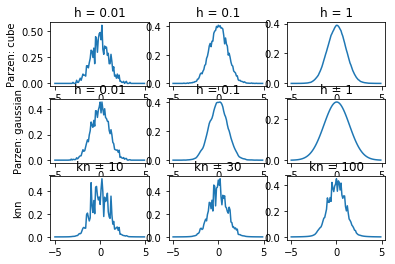

In [11]:
test_1D_pk()

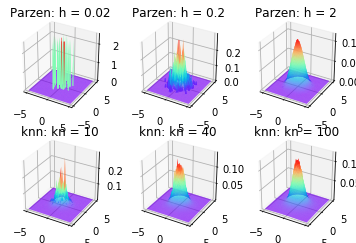

In [12]:
test_2D_pk()